<a href="https://colab.research.google.com/github/hanansuk/guns_n_roses/blob/main/cdc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('lmtest')
install.packages('sandwich')
install.packages('stargazer')
install.packages('corrplot')
install.packages('plotly')
install.packages('googledrive')
install.packages('httpuv')
install.packages('reshape2')
install.packages('ggrepel')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(stringr)
library(sandwich)
library(lmtest)
library(stargazer)
library(cli)
library(corrplot)
library(scales)
library(tidyverse)
library(stats)
library(plotly)
library(ggrepel)
library(reshape2)
library(googledrive) 
library(httpuv)
library(repr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


corrplot 0.92 loaded

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ purrr   1.0.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()


Attaching package: ‘plotly’


In [3]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) { #may update python version  
                                       #occasionally
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

In [4]:
lagpad <- function(x, k) {
  if (k>0 & (k %% 5 != 0)) {
    return (c(rep(NA, k), x)[1 : length(x)] );
  }
  else {
    return (c(x[(-k+1) : length(x)], rep(NA, -k)));
  }
}

In [13]:
x <- drive_get("~/deaths_by_month_2_v2.txt")
drive_download(x, overwrite = TRUE)
cdc1 <- read.table("/content/deaths_by_month_2_v2.txt", header = TRUE, sep = '\t', dec = ".", row.names=NULL)
cdc1 <- cdc1[,-1]

✔ The input `path` resolved to exactly 1 file.

File downloaded:

• deaths_by_month_2_v2.txt <id: 1ptxT6uvAkI80iF6VWFYc_x1xPemhmuv4>

Saved locally as:

• deaths_by_month_2_v2.txt



In [18]:
x <- drive_get("~/deaths_by_month_2.txt")
drive_download(x, overwrite = TRUE)
cdc2 <- read.table("/content/deaths_by_month_2.txt", header = TRUE, sep = '\t', dec = ".", row.names=NULL)
cdc2 <- cdc2[,-1]
cdc2 <- cdc2 %>%
    filter(Year == 2021)

✔ The input `path` resolved to exactly 1 file.

File downloaded:

• deaths_by_month_2.txt <id: 16iTRL_xh2op8Gj6-ORnrxrTDRZ-p-ZGl>

Saved locally as:

• deaths_by_month_2.txt



In [19]:
cdc = rbind(cdc1, cdc2)

In [20]:
glimpse(cdc)
head(cdc)

Rows: 1,173
Columns: 7
$ State      <chr> "Alabama", "Alabama", "Alabama", "Alabama", "Alabama", "Ala…
$ State.Code <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Year       <dbl> 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,…
$ Year.Code  <int> 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,…
$ Deaths     <int> 787, 764, 737, 724, 764, 677, 731, 778, 811, 819, 829, 781,…
$ Population <int> 4430141, 4447100, 4467634, 4480089, 4503491, 4530729, 45698…
$ Crude.Rate <dbl> 17.8, 17.2, 16.5, 16.2, 17.0, 14.9, 16.0, 16.8, 17.4, 17.4,…


,State,State.Code,Year,Year.Code,Deaths,Population,Crude.Rate
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,Alabama,1,1999,1999,787,4430141,17.8
2,Alabama,1,2000,2000,764,4447100,17.2
3,Alabama,1,2001,2001,737,4467634,16.5
4,Alabama,1,2002,2002,724,4480089,16.2
5,Alabama,1,2003,2003,764,4503491,17.0
6,Alabama,1,2004,2004,677,4530729,14.9


In [21]:
summary(cdc)

    State             State.Code         Year        Year.Code   
 Length:1173        Min.   : 1.00   Min.   :1999   Min.   :1999  
 Class :character   1st Qu.:16.00   1st Qu.:2004   1st Qu.:2004  
 Mode  :character   Median :29.00   Median :2010   Median :2010  
                    Mean   :28.96   Mean   :2010   Mean   :2010  
                    3rd Qu.:42.00   3rd Qu.:2016   3rd Qu.:2016  
                    Max.   :56.00   Max.   :2021   Max.   :2021  
     Deaths         Population         Crude.Rate   
 Min.   :  28.0   Min.   :  491780   Min.   : 2.20  
 1st Qu.: 173.0   1st Qu.: 1683140   1st Qu.: 8.80  
 Median : 473.0   Median : 4219239   Median :11.60  
 Mean   : 661.8   Mean   : 6034314   Mean   :11.99  
 3rd Qu.: 920.0   3rd Qu.: 6902149   3rd Qu.:15.00  
 Max.   :4575.0   Max.   :39557045   Max.   :34.00  

In [22]:
cdc_2 <- cdc %>%
  arrange(State, Year)

cdc_2$Year = as.numeric(as.character(cdc_2$Year))

In [24]:
cdc_by_state <- cdc_2 %>%
  mutate(YoY = (((Deaths - lagpad(Deaths, 1))/Deaths)))

lag_function <- function(x) {
  x[seq_along(x) %% 23 == 0] <- NA
  x
}

cdc_by_state$YoY[2:nrow(cdc_by_state)] <- lag_function(cdc_by_state$YoY[2:nrow(cdc_by_state)])


cdc_by_state

State,State.Code,Year,Year.Code,Deaths,Population,Crude.Rate,YoY
<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
Alabama,1,1999,1999,787,4430141,17.8,NA
Alabama,1,2000,2000,764,4447100,17.2,-0.030104712
Alabama,1,2001,2001,737,4467634,16.5,-0.036635007
Alabama,1,2002,2002,724,4480089,16.2,-0.017955801
Alabama,1,2003,2003,764,4503491,17.0,0.052356021
Alabama,1,2004,2004,677,4530729,14.9,-0.128508124
Alabama,1,2005,2005,731,4569805,16.0,0.073871409
Alabama,1,2006,2006,778,4628981,16.8,0.060411311
Alabama,1,2007,2007,811,4672840,17.4,0.040690506


In [43]:
top_bottom_states <- cdc_by_state %>%
  group_by(State) %>%
  filter(Year != 1999) %>%
  summarise(avg_growth_rate = mean(YoY)) %>%
  filter(dense_rank(avg_growth_rate) <= 2 | dense_rank(desc(avg_growth_rate)) <= 2) %>%
  arrange(desc(avg_growth_rate))

top_bottom_states

State,avg_growth_rate
<fct>,<dbl>
Utah,0.036051794
Colorado,0.034555993
District of Columbia,-0.005998722
Rhode Island,-0.025814606


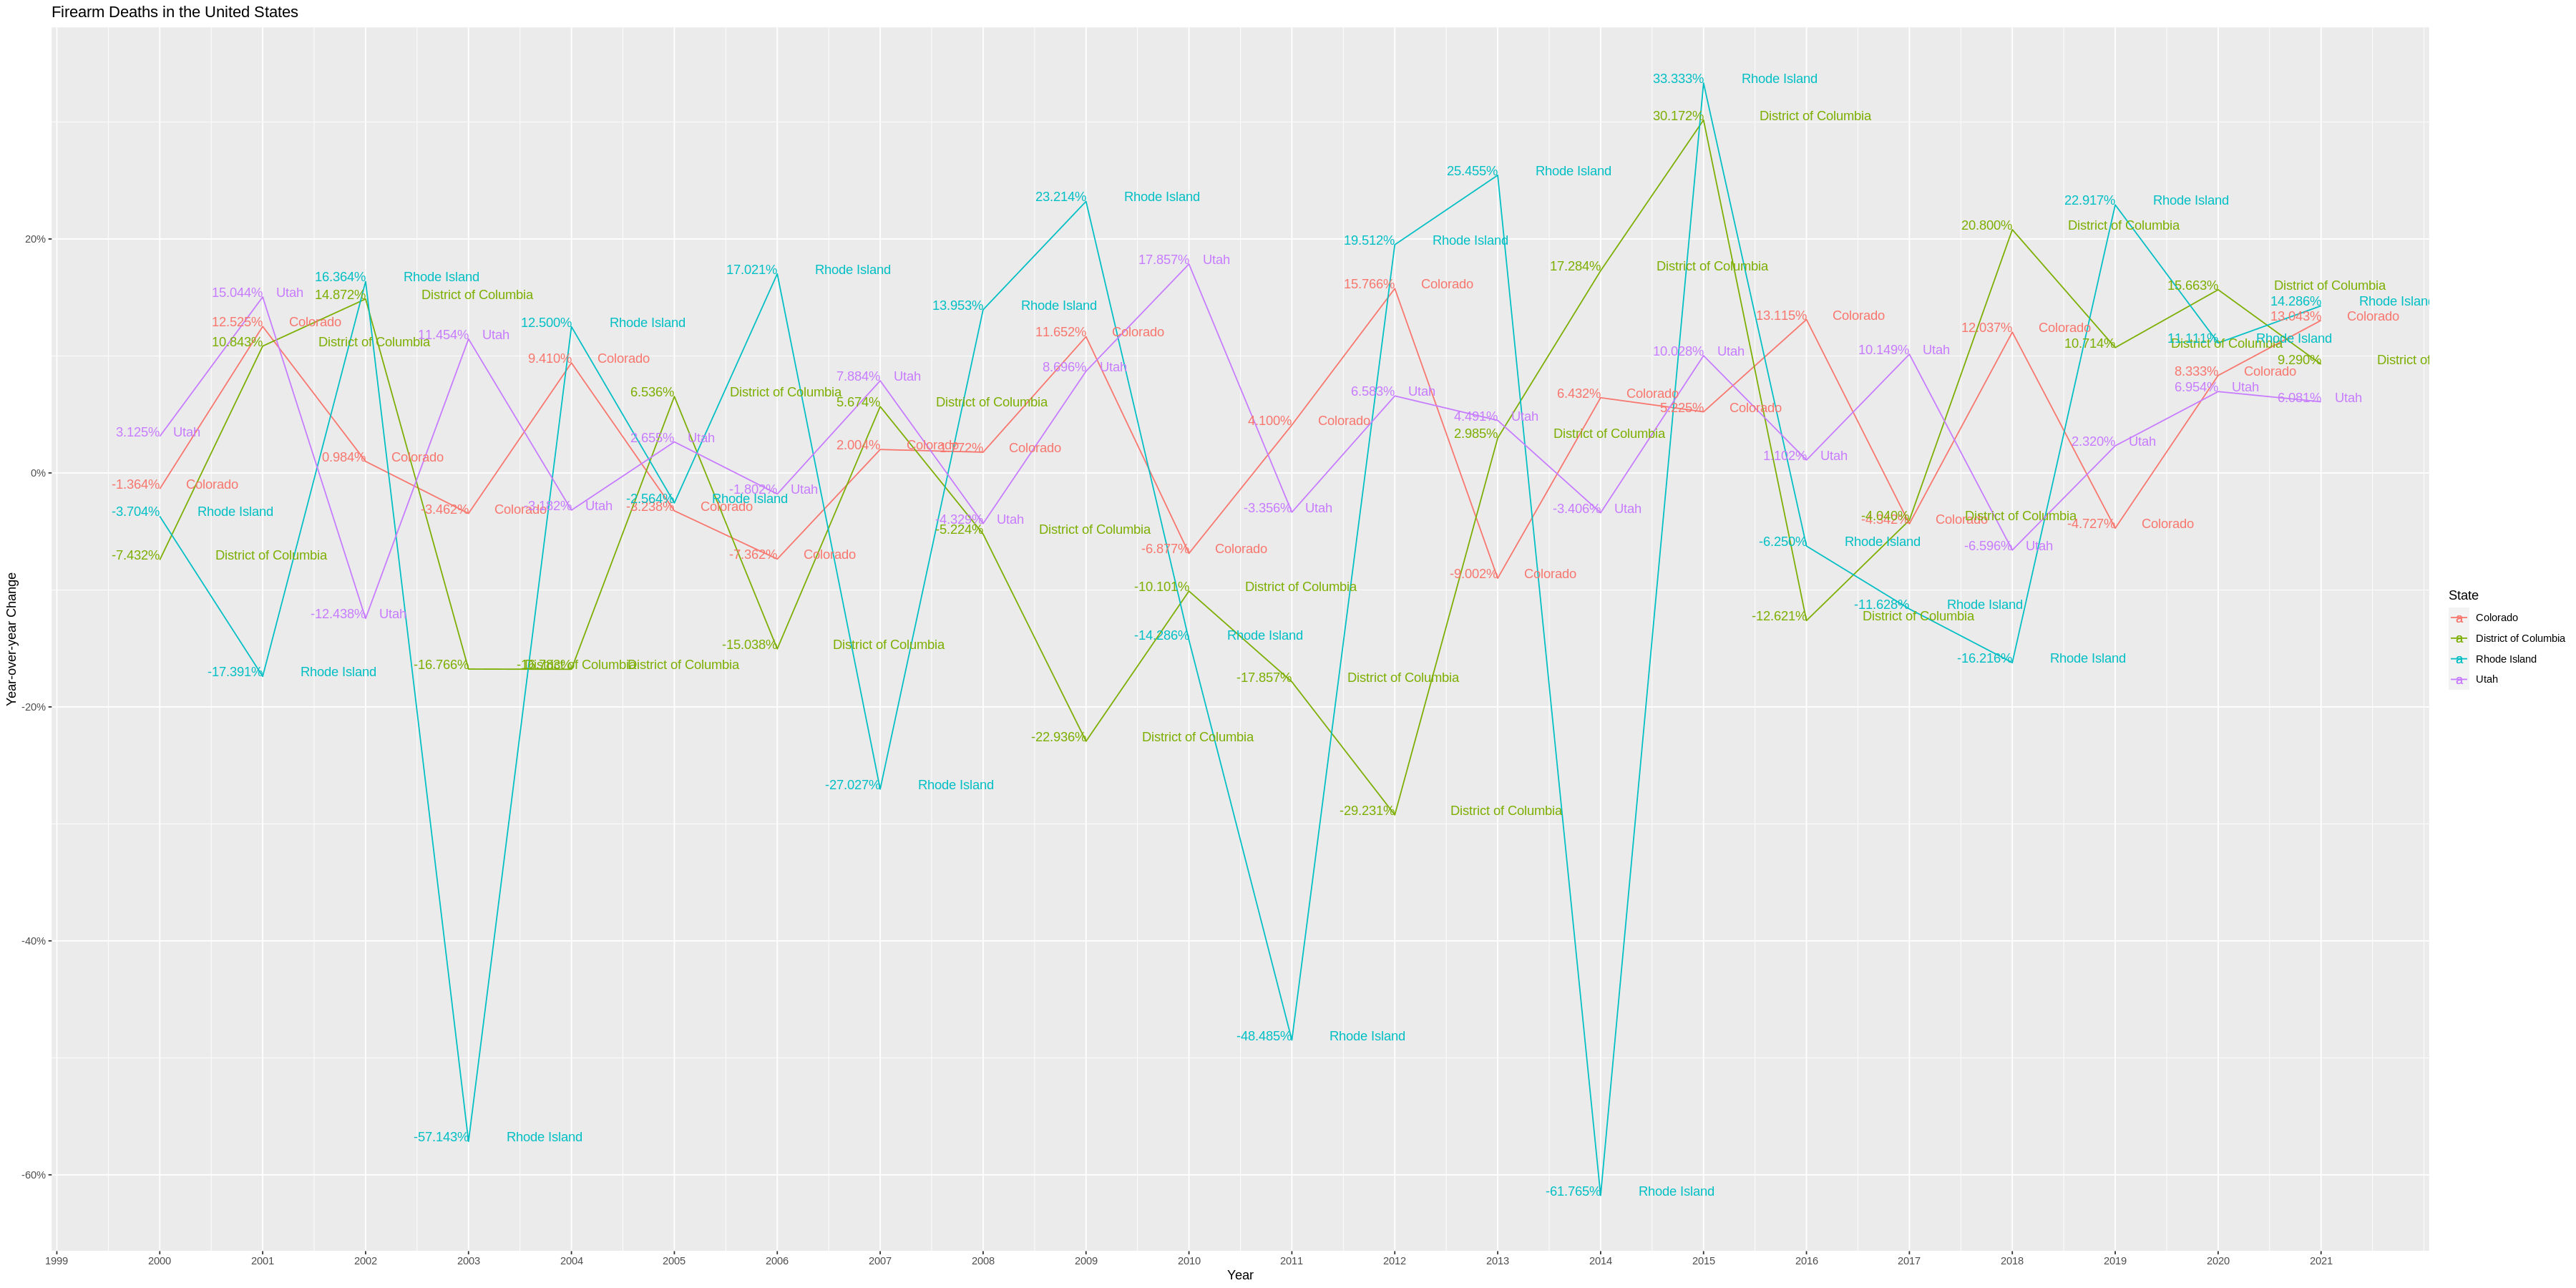

In [44]:
options(repr.plot.width=30, repr.plot.height=15)

cdc_by_state$Year <- as.numeric(as.character(cdc_by_state$Year))
cdc_by_state$State <- factor(cdc_by_state$State)

cdc_by_state %>%
  filter(State %in% top_bottom_states$State & Year != 1999) %>%
  ggplot(aes(x = Year, y = YoY, color = State)) +
  geom_line() +
  scale_x_continuous(breaks = seq(1999, 2021, 1)) +
  labs(color = "State") +
  scale_y_continuous(labels = scales::percent) +
  geom_text(aes(x = Year, y = YoY, label = State), hjust = -0.5, vjust = 0) +
  geom_text(aes(x = Year, y = YoY, label = label_percent()(YoY)), hjust = 1, vjust = 0) +
  ggtitle("Firearm Deaths in the United States") +
  xlab("Year") +
  ylab("Year-over-year Change")

In [46]:
top_bottom_states_all <- cdc_by_state %>%
  group_by(State) %>%
  filter(Year != 1999) %>%
  summarise(avg_growth_rate = (mean(YoY)), crude_rate = (mean(Deaths/Population))*1000) %>%
  arrange(desc(avg_growth_rate))

top_bottom_states_all

State,avg_growth_rate,crude_rate
<fct>,<dbl>,<dbl>
Utah,0.0360517940,0.10620810
Colorado,0.0345559931,0.12327951
North Dakota,0.0337070852,0.10310709
Texas,0.0336579748,0.11269559
South Carolina,0.0310803167,0.15657706
Georgia,0.0291032342,0.13883555
Ohio,0.0290642129,0.10838052
Missouri,0.0288682393,0.15701567
New Mexico,0.0275107642,0.16647130


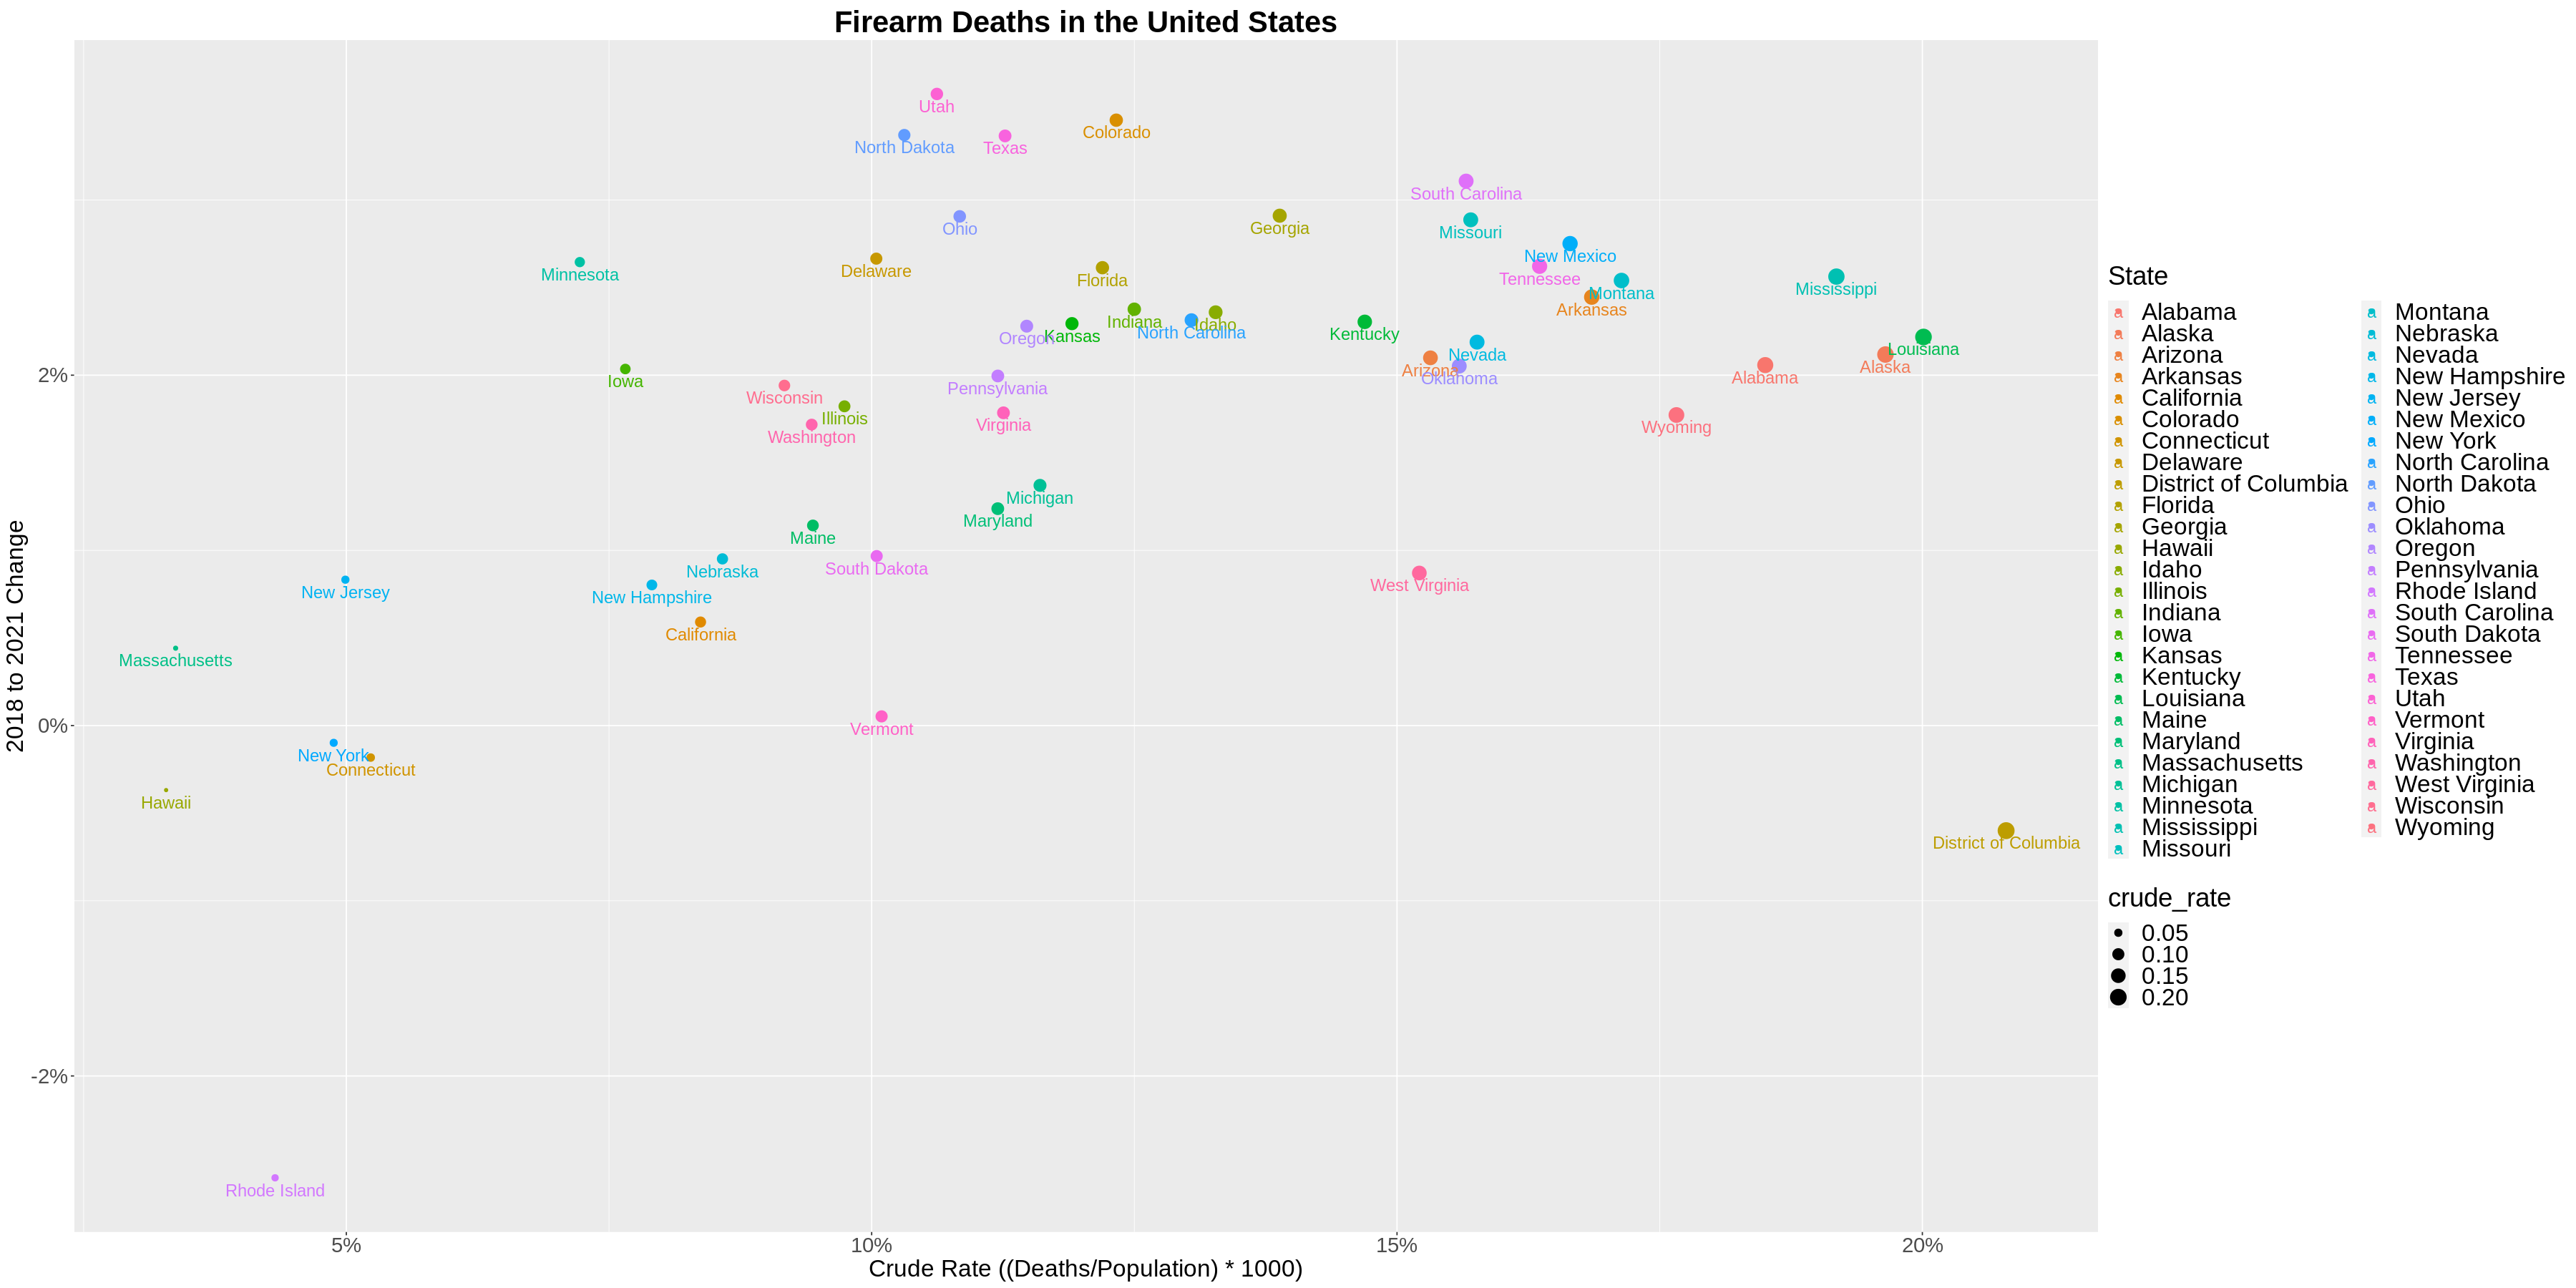

In [47]:
options(repr.plot.width=30, repr.plot.height=15)

cdc_by_state$Year <- as.numeric(as.character(cdc_by_state$Year))
cdc_by_state$State <- factor(cdc_by_state$State)

top_bottom_states_all %>%
  ggplot(aes(x = crude_rate, y = avg_growth_rate, color=State)) +
  geom_point(aes(size = crude_rate)) +
  geom_text(aes(x = crude_rate, y = avg_growth_rate, label=State), hjust = 0.5, vjust = 1.5, cex = 5) +
  theme(axis.title = element_text(size = 20),
        legend.text = element_text(size = 20),
        legend.box.spacing = unit(0.1, "cm"),
        legend.title = element_text(size = 22),
        axis.text.x = element_text(size = rel(2)),
        axis.text.y = element_text(size = rel(2)),
        plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2))+
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(labels = scales::percent) +
  ggtitle("Firearm Deaths in the United States") +
  guides(colour=guide_legend(ncol=2)) +
  xlab("Crude Rate ((Deaths/Population) * 1000)") +
  ylab("2018 to 2021 Change")

In [48]:
cdc_yoy <- cdc_2 %>%
  group_by(Year) %>%
  summarise(Deaths = sum(Deaths), Population = sum(Population)) %>%
  mutate(YoY = (((Deaths - lag(Deaths, 1))/Deaths)), YoY_Population = (((Population - lag(Population, 1))/Population)))

cdc_yoy

Year,Deaths,Population,YoY,YoY_Population
<dbl>,<int>,<int>,<dbl>,<dbl>
1999,28575,279040168,NA,NA
2000,28393,281421906,-0.0064100306,0.008463229
2001,29250,284968955,0.0292991453,0.012447142
2002,29942,287625193,0.0231113486,0.009235067
2003,29789,290107933,-0.0051361241,0.008557987
2004,29258,292805298,-0.0181488824,0.009212145
2005,30364,295516599,0.0364247135,0.009174784
2006,30536,298379912,0.0056326958,0.009596199
2007,30873,301231207,0.0109156868,0.009465470


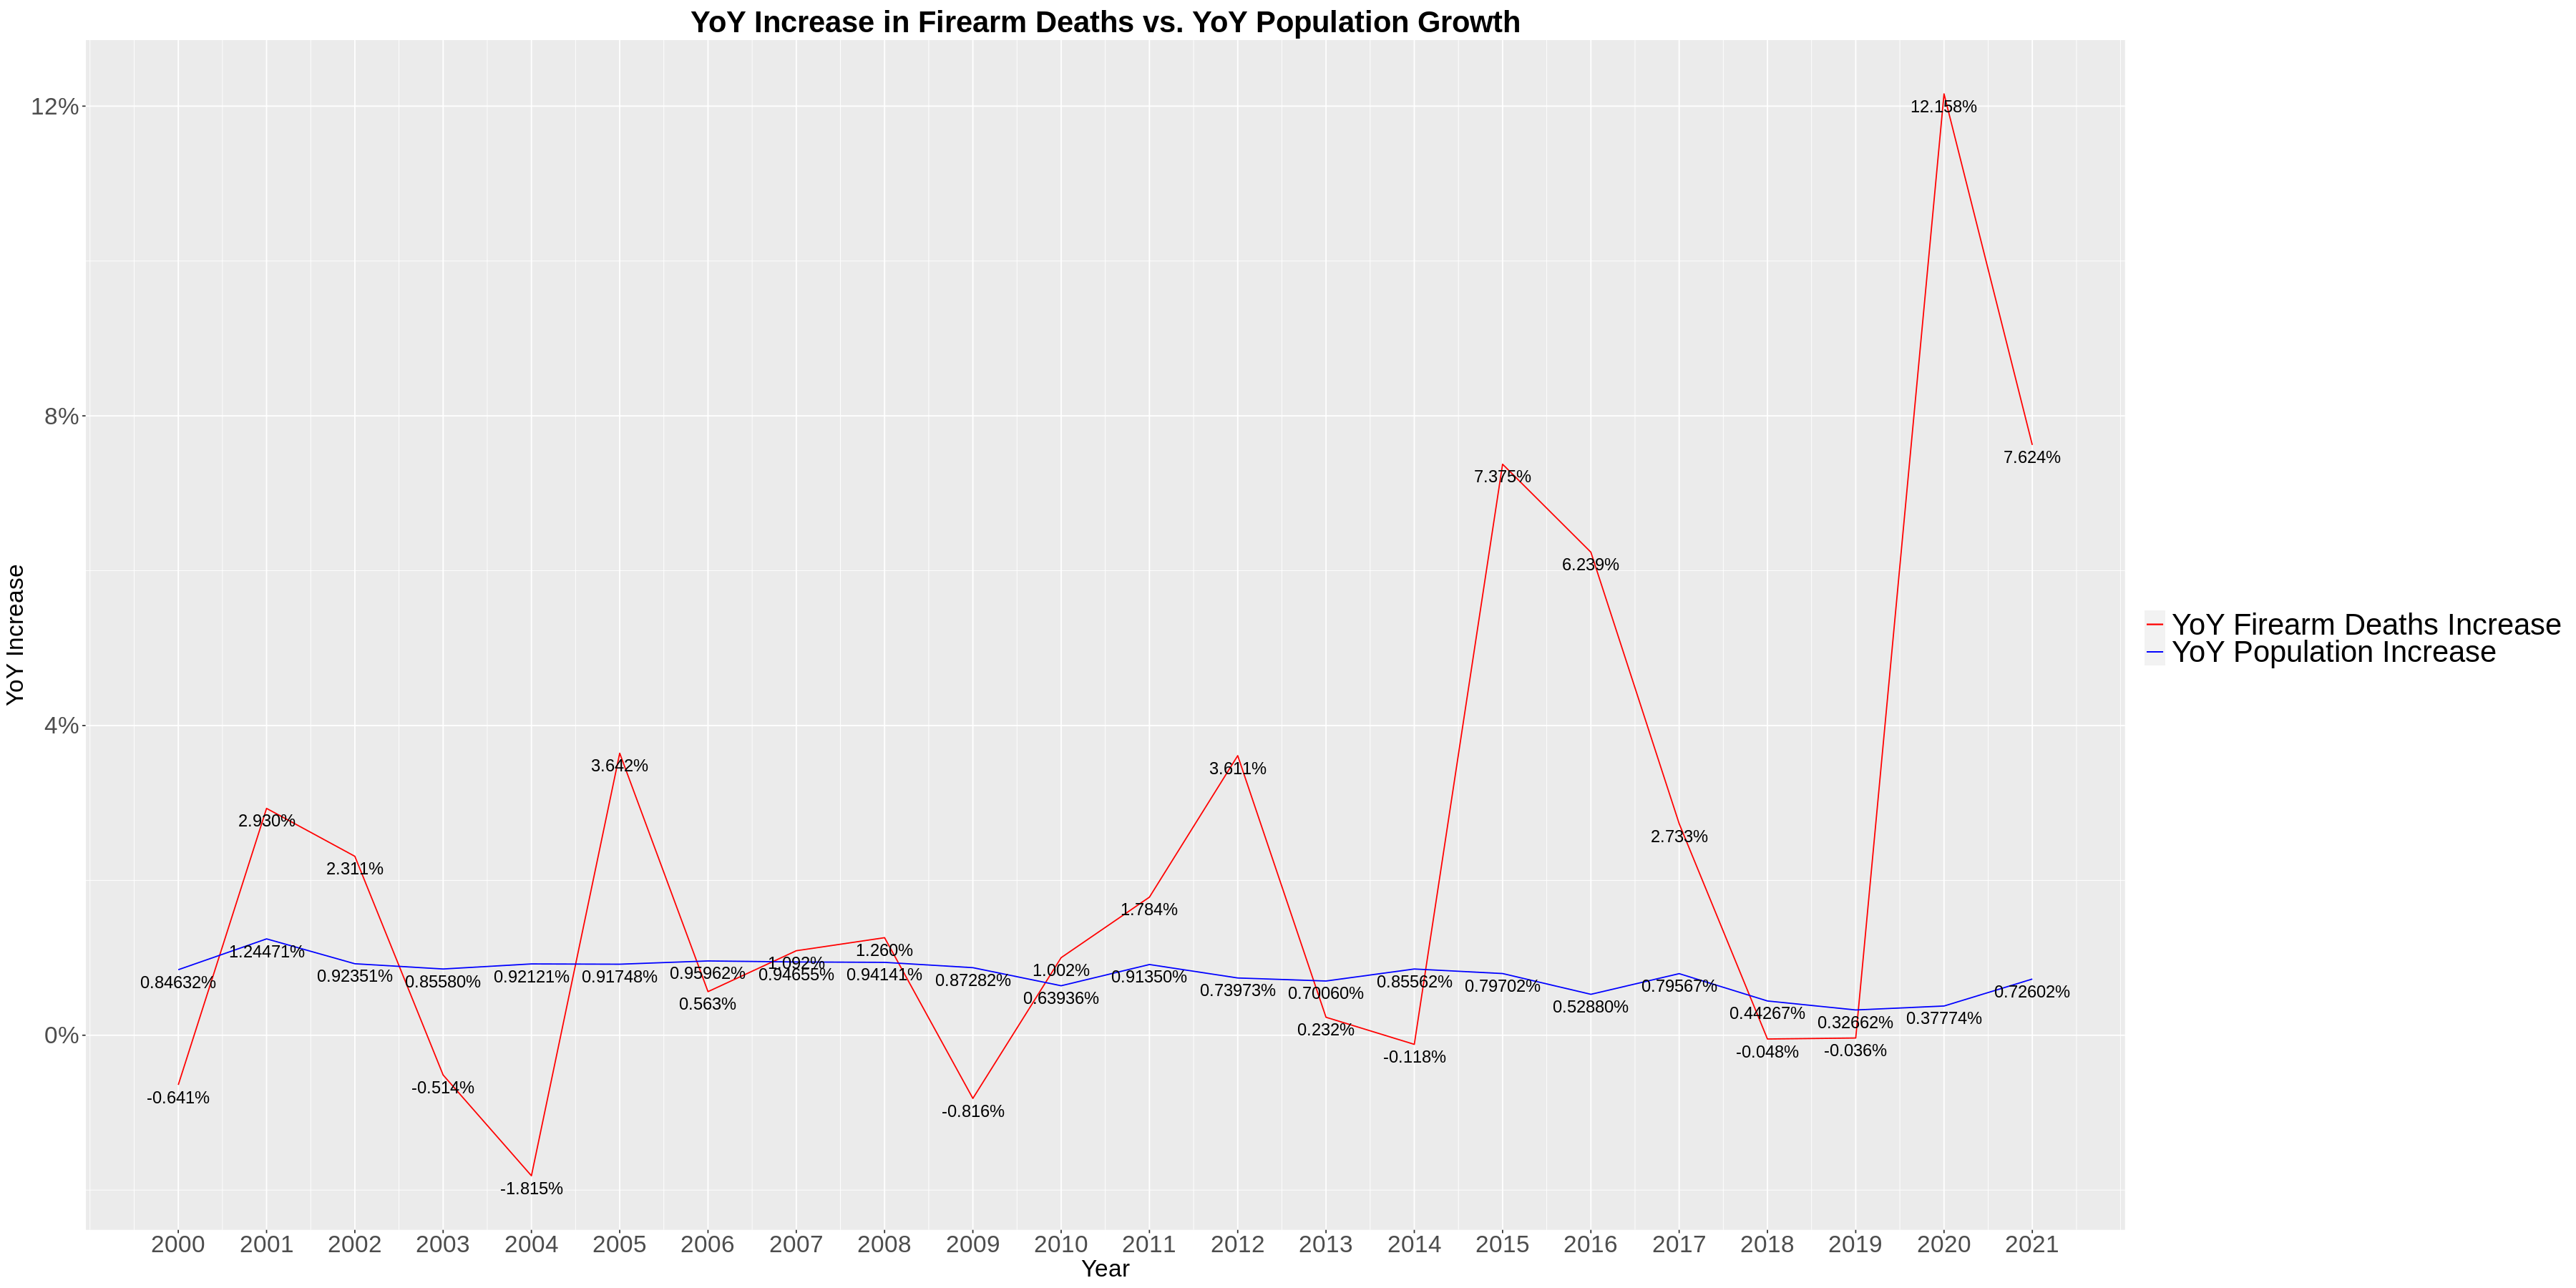

In [52]:
options(repr.plot.width=30, repr.plot.height=15)

cdc_yoy$Year <- as.numeric(as.character(cdc_yoy$Year))

cdc_yoy %>%
filter(!(is.na(YoY))) %>%
ggplot(aes(x = Year)) +
  geom_line(aes(y = YoY, color = "YoY Firearm Deaths Increase")) +
  geom_line(aes(y = YoY_Population, color = "YoY Population Increase")) +
  scale_color_manual(values = c("red", "blue")) +
  labs(title = "YoY Increase in Firearm Deaths vs. YoY Population Growth", x = "Year", y = "YoY Increase") +
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(breaks = seq(2000, 2021, 1)) +
  geom_text(aes(x = Year, y = YoY, label = scales::percent(YoY)), vjust = 1.5, cex = 5) +
  geom_text(aes(x = Year, y = YoY_Population, label = scales::percent(YoY_Population)), vjust = 1.5, cex = 5) +
  theme(
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 10),
    legend.title = element_blank(),
    legend.text = element_text(size = 25),
    plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2),
    axis.text.x = element_text(size = rel(2)),
    axis.text.y = element_text(size = rel(2)),
  )


In [84]:
x <- drive_get("~/deaths_by_month_3.txt")
drive_download(x, overwrite = TRUE)
cdc_3_1 <- read.table("/content/deaths_by_month_3.txt", header = TRUE, sep = '\t', dec = ".", row.names=NULL)
cdc_3_1 <- cdc_3_1[,-1]
cdc_3_1 <- cdc_3_1 %>%
    filter(Year == 2021)

✔ The input `path` resolved to exactly 1 file.

File downloaded:

• deaths_by_month_3.txt <id: 1E5vsdYy7-VwieRNfKlmMDLXi__Q8iTWF>

Saved locally as:

• deaths_by_month_3.txt



In [85]:
x <- drive_get("~/deaths_by_month_3_v2.txt")
drive_download(x, overwrite = TRUE)
cdc_3_2 <- read.table("/content/deaths_by_month_3_v2.txt", header = TRUE, sep = '\t', dec = ".", row.names=NULL)
cdc_3_2 <- cdc_3_2[,-1]

✔ The input `path` resolved to exactly 1 file.

File downloaded:

• deaths_by_month_3_v2.txt <id: 1fzfhbRRcUIoSNtZdm4xVnIW5H03mceVL>

Saved locally as:

• deaths_by_month_3_v2.txt



In [86]:
cdc_3 = rbind(cdc_3_1, cdc_3_2)

In [87]:
glimpse(cdc_3)
head(cdc_3)

Rows: 1,104
Columns: 9
$ Year                       <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2…
$ Year.Code                  <int> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2…
$ Month                      <chr> "Jan., 2021 ", "Jan., 2021 ", "Jan., 2021 "…
$ Month.Code                 <chr> "2021/01", "2021/01", "2021/01", "2021/01",…
$ ICD.10.113.Cause.List      <chr> "Accidental discharge of firearms (W32-W34)…
$ ICD.10.113.Cause.List.Code <chr> "GR113-119", "GR113-125", "GR113-128", "GR1…
$ Deaths                     <chr> "45", "2148", "1703", "43", "48", "1976", "…
$ Population                 <chr> "Not Applicable", "Not Applicable", "Not Ap…
$ Crude.Rate                 <chr> "Not Applicable", "Not Applicable", "Not Ap…


,Year,Year.Code,Month,Month.Code,ICD.10.113.Cause.List,ICD.10.113.Cause.List.Code,Deaths,Population,Crude.Rate
,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2021,2021,"Jan., 2021",2021/01,Accidental discharge of firearms (W32-W34),GR113-119,45,Not Applicable,Not Applicable
2,2021,2021,"Jan., 2021",2021/01,Intentional self-harm (suicide) by discharge of firearms (X72-X74),GR113-125,2148,Not Applicable,Not Applicable
3,2021,2021,"Jan., 2021",2021/01,"Assault (homicide) by discharge of firearms (*U01.4,X93-X95)",GR113-128,1703,Not Applicable,Not Applicable
4,2021,2021,"Jan., 2021",2021/01,"Discharge of firearms, undetermined intent (Y22-Y24)",GR113-132,43,Not Applicable,Not Applicable
5,2021,2021,"Feb., 2021",2021/02,Accidental discharge of firearms (W32-W34),GR113-119,48,Not Applicable,Not Applicable
6,2021,2021,"Feb., 2021",2021/02,Intentional self-harm (suicide) by discharge of firearms (X72-X74),GR113-125,1976,Not Applicable,Not Applicable


In [88]:
cdc_3 = subset(cdc_3, select = -c(Population, Crude.Rate))

In [89]:
summary(cdc_3)

      Year        Year.Code       Month            Month.Code       
 Min.   :1999   Min.   :1999   Length:1104        Length:1104       
 1st Qu.:2004   1st Qu.:2004   Class :character   Class :character  
 Median :2010   Median :2010   Mode  :character   Mode  :character  
 Mean   :2010   Mean   :2010                                        
 3rd Qu.:2016   3rd Qu.:2016                                        
 Max.   :2021   Max.   :2021                                        
 ICD.10.113.Cause.List ICD.10.113.Cause.List.Code    Deaths         
 Length:1104           Length:1104                Length:1104       
 Class :character      Class :character           Class :character  
 Mode  :character      Mode  :character           Mode  :character  
                                                                    
                                                                    
                                                                    

In [90]:
cdc_3 %>%
  filter(Deaths == 'Suppressed')

Year,Year.Code,Month,Month.Code,ICD.10.113.Cause.List,ICD.10.113.Cause.List.Code,Deaths
<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
2003,2003,"Feb., 2003",2003/02,"Discharge of firearms, undetermined intent (Y22-Y24)",GR113-132,Suppressed
2006,2006,"Jun., 2006",2006/06,"Discharge of firearms, undetermined intent (Y22-Y24)",GR113-132,Suppressed
2009,2009,"Jul., 2009",2009/07,"Discharge of firearms, undetermined intent (Y22-Y24)",GR113-132,Suppressed
2011,2011,"Jun., 2011",2011/06,"Discharge of firearms, undetermined intent (Y22-Y24)",GR113-132,Suppressed


In [97]:
cdc_3 <- cdc_3[cdc_3$Deaths != 'Suppressed',]

cdc_3$Deaths = as.integer(cdc_3$Deaths)

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


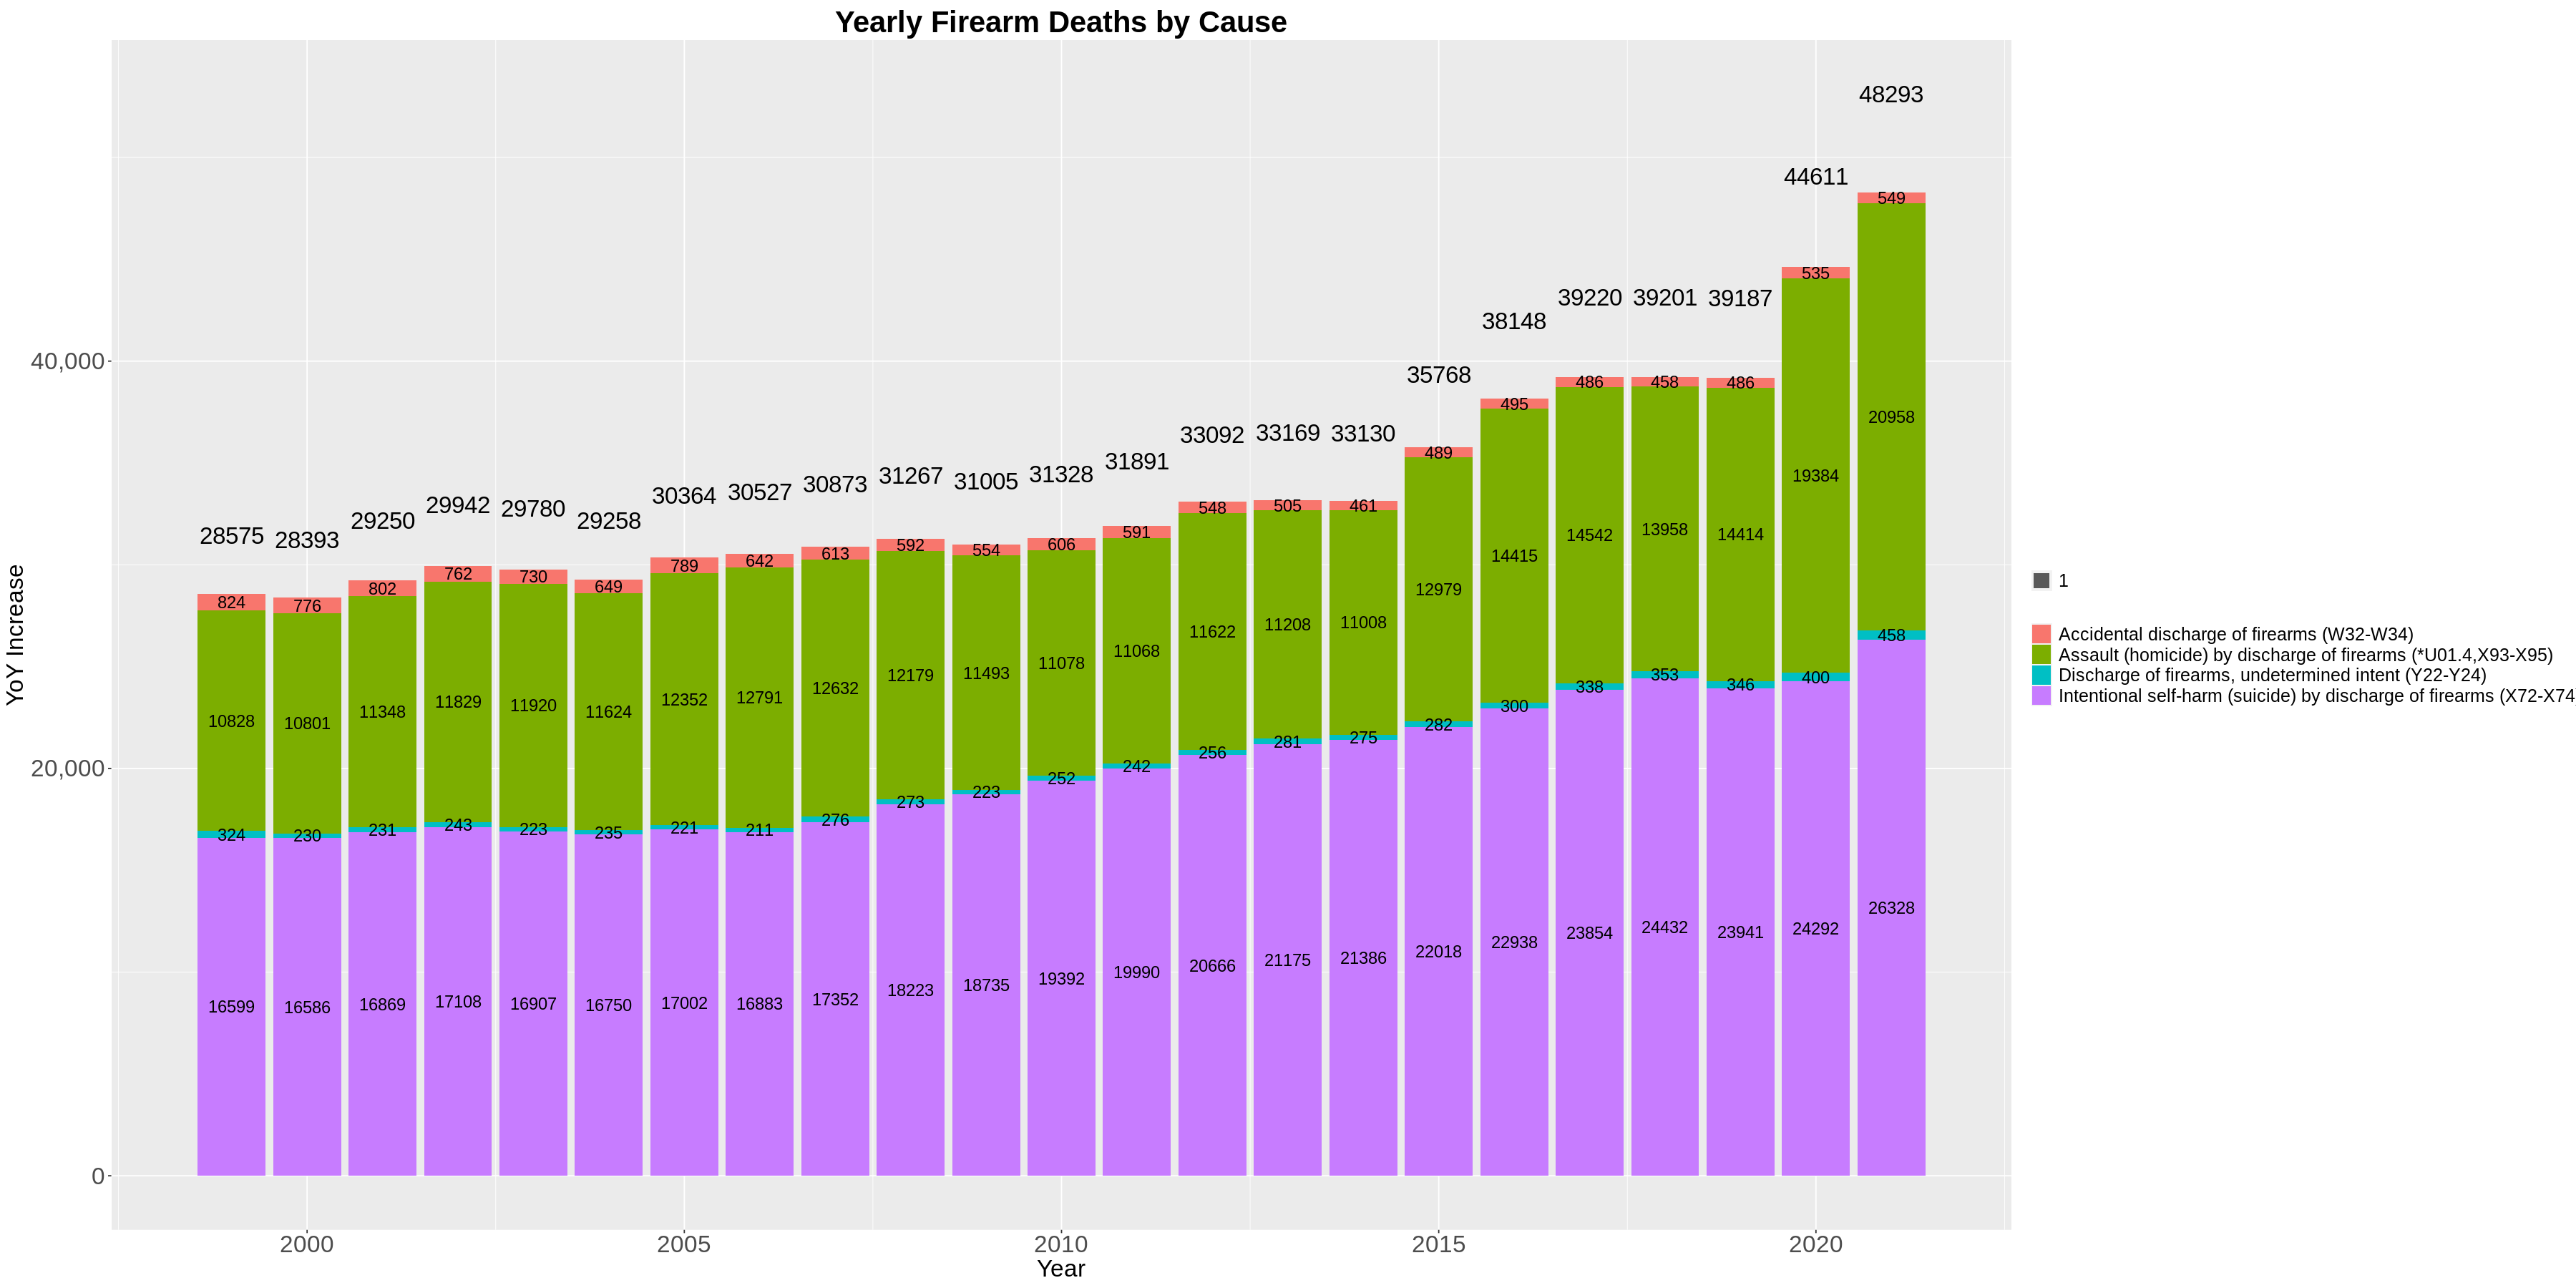

In [98]:
cdc_3 %>%
  group_by(Year, ICD.10.113.Cause.List) %>%
  summarise(Deaths = sum(Deaths))  %>%
  arrange(Year, desc(Deaths)) %>%
  ggplot(aes(x = Year, fill = ICD.10.113.Cause.List, y = Deaths, label = Deaths)) +
  geom_bar(position="stack", stat="sum") +
  geom_text(size = 5, position = position_stack(vjust = 0.5)) + 
  geom_text(aes(label = after_stat(y), group = Year), stat = 'summary', fun = sum, size = 7, position = position_stack(vjust = 1.1)) + 
  labs(title = "Yearly Firearm Deaths by Cause", x = "Year", y = "YoY Increase") +
  scale_y_continuous(labels = scales::label_comma()) +
  theme(
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 10),
    legend.title = element_blank(),
    legend.text = element_text(size = 15),
    plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2),
    axis.text.x = element_text(size = rel(2)),
    axis.text.y = element_text(size = rel(2)),
  ) 

In [99]:
## final export
write.csv(cdc_by_state, "cdc_by_state.csv", row.names=FALSE)
write.csv(cdc_3, "cdc_by_death_cause.csv", row.names=FALSE)

